In [40]:
import tensorflow as tf
import pandas
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import math

In [22]:
datos, metadatos = tfds.load("mnist", as_supervised = True, with_info = True)

In [23]:
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year

In [24]:
dt_training = datos["train"]
dt_test = datos["test"]

In [25]:
label_class = metadatos.features["label"].names

Vamos a normalizar los datos

In [26]:
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255
  return imagenes, etiquetas

dt_training = dt_training.map(normalizar)
dt_test = dt_test.map(normalizar)

In [27]:
dt_training = dt_training.cache()
dt_test = dt_test.cache()

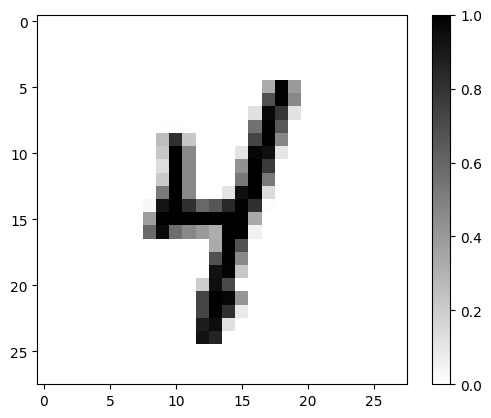

In [28]:
for imagen, etiqueta in dt_training.take(1):
  break

plt.figure()
plt.imshow(imagen, cmap = plt.cm.binary)
plt.colorbar()
plt.show()

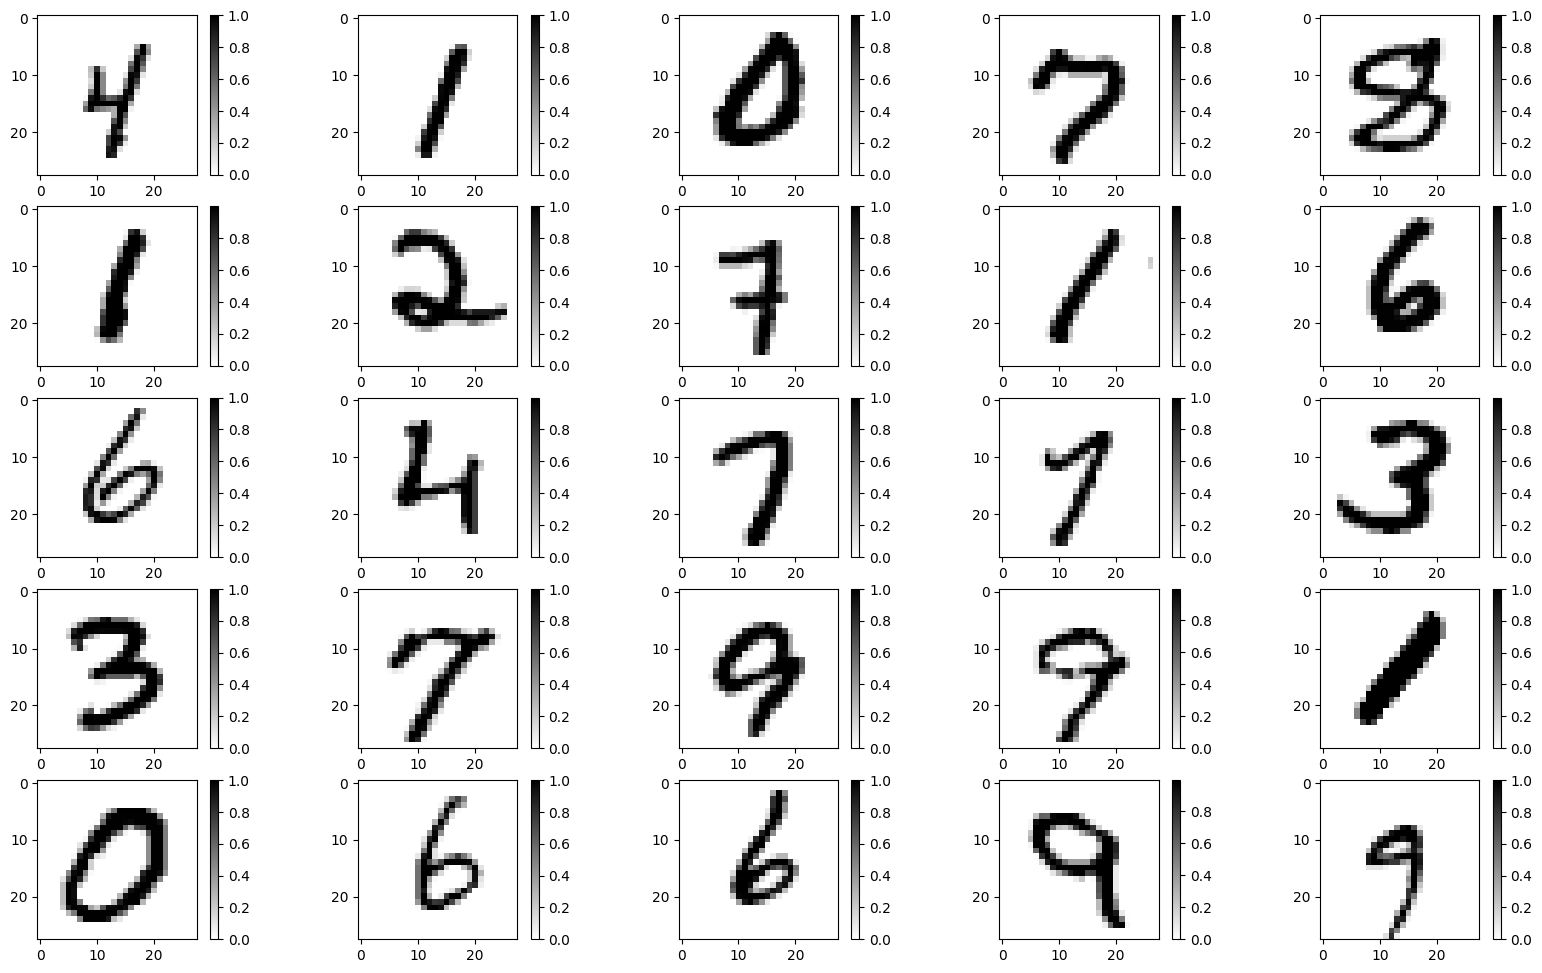

In [33]:
plt.figure(figsize=(20,12))
for i, (imagen, etiqueta) in enumerate(dt_training.take(25)):
  plt.subplot(5,5,i+1)
  plt.imshow(imagen, cmap = plt.cm.binary)
  plt.colorbar()
plt.show()

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)), # Aqui le pasamos las imagenes de entrada
    #Aqui se encuentra la capa oculta
    tf.keras.layers.Dense(50, activation = tf.nn.relu),
    #Aqui se encuentra la capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [39]:
tamaño_lote = 32
dt_training = dt_training.repeat().shuffle(60000).batch(tamaño_lote)
dt_test = dt_test.batch(tamaño_lote)

In [47]:
training = model.fit(
    dt_training , epochs = 10,
    steps_per_epoch = math.ceil(60000/ tamaño_lote)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8526 - loss: 0.5233
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9513 - loss: 0.1695
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9624 - loss: 0.1250
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9700 - loss: 0.1019
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9744 - loss: 0.0868
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9764 - loss: 0.0763
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9807 - loss: 0.0627
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9837 - loss: 0.0539
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9843 - loss: 0.0492
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9864 - loss: 0.0436
